In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.optim as optim

In [2]:
# make input data
N = 100
a_data =  - 1
b_data = 1
sigma_data = 0.1
x_data = 2 * np.random.rand(N)
y_data = a_data * x_data + b_data + sigma_data * np.random.randn(N)

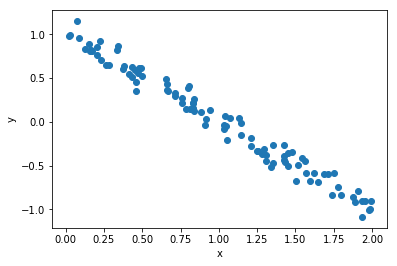

In [3]:
plt.scatter(x_data,y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('img/sample.png')

## Use  Package Optimizer

In [13]:
# 変数の定義
a = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

#データの変換
x_train = torch.tensor(x_data)
y_train = torch.tensor(y_data)

# 最適化関数の設定
optimizer = optim.Adam([a, b])

# 繰り返し回数
epoch = 4000

loss_epoch = np.zeros(epoch)

for i in range(epoch):
    #optimizerに使われていた勾配の初期化
    optimizer.zero_grad()
    #線形モデル
    y_hat = a * x_train + b
    #loss関数の計算
    loss = (y_train - y_hat).norm()
    loss_epoch[i] = loss.item()
    #勾配の設定
    loss.backward()
    #最適化の実行
    optimizer.step()


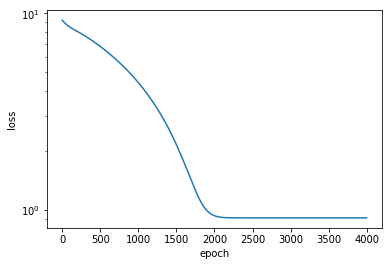

In [14]:
plt.plot(loss_epoch)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('img/Adam_loss.png')

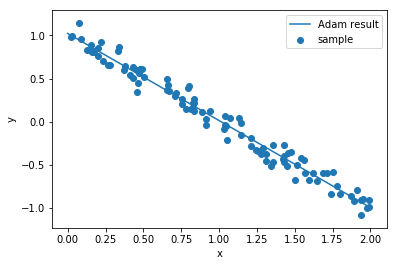

In [15]:
x_line = np.arange(0,2,0.001)
plt.plot(x_line, a.item()*x_line+b.item(),label = 'Adam result')
plt.scatter(x_data,y_data,label = 'sample')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('img/Adam.png')

## Use own Optimizer

In [7]:
# データ定義
a = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)

#データの変換
x_train = torch.tensor(x_data)
y_train = torch.tensor(y_data)

# 学習率
eta = 0.001

# 繰り返し回数
epoch = 4000
loss_epoch = np.zeros(epoch)
for i in range(epoch):
    #勾配の記録開始
    a.requires_grad_(True)
    b.requires_grad_(True)
    #予測とloss関数の計算
    y_hat = a * x_train + b
    loss = (y_train - y_hat).norm()
    loss_epoch[i] = loss.item()
    #勾配の設定
    loss.backward()
    #勾配の記録停止
    a.requires_grad_(False)
    b.requires_grad_(False)

    #勾配を用いた更新 
    a = a - eta * a.grad
    b = b - eta * b.grad


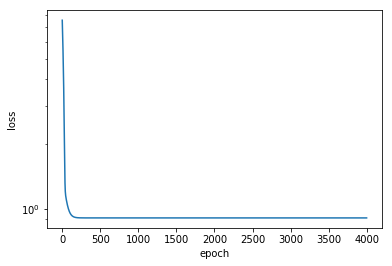

In [8]:
plt.plot(loss_epoch)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('img/original_loss.png')

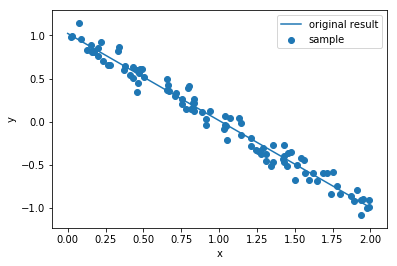

In [9]:
x_line = np.arange(0,2,0.001)
plt.plot(x_line, a.item()*x_line+b.item(),label = 'original result')
plt.scatter(x_data,y_data,label = 'sample')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('img/original.png')